In [51]:
import sys
import tweepy
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from wordcloud import WordCloud, STOPWORDS
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
consumer_key = 'bfm7Dye63QkREO07nxEgtkJqz'
consumer_secret = 'bSXOCQFHZm5Xpvye1TWdvsk7qVr7Ta1eGKyTtqDmtLv8hwtRrk'
access_token = '2870298046-X7KZg4FFp9nnnMrRd02AXOznPzYg4ZR4flrjYje'
access_token_secret = 'KGaRJgtEn15ywYIPYgLjoCxHpxybqSI2qk4gitWffftn6'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [53]:
tweets = api.user_timeline('@realDonaldTrump', count=5, tweet_mode='extended')
for t in tweets:
    print(t.full_text)
    print()

RT @dougmillsnyt: Plant workers and officials look on as @realDonaldTrump  makes remarks at the Ford Rawsonville Components Plant in Ypsila…

RT @dougmillsnyt: .@realDonaldTrump &amp; @FLOTUS participate in a Memorial Day Ceremony at Fort McHenry National Monument and Historic Shrine,…

RT @dougmillsnyt: .@realDonaldTrump &amp; @FLOTUS board Air Force One at Joint Base Andrews, Md. for a trip to Florida to watch the viewing of…

RT @dougmillsnyt: .@realDonaldTrump holds a bible up outside the Historic St. John’s Church that was damaged during a night of unrest near…

RT @dougmillsnyt: .@realDonaldTrump walks from the White House to the Historic St. John’s Church that was damaged during a night of unrest.…



In [54]:
def list_tweets(user_id, count, prt=False):
    tweets = api.user_timeline(
        "@" + user_id, count=count, tweet_mode='extended')
    tw = []
    for t in tweets:
        tw.append(t.full_text)
        if prt:
            print(t.full_text)
            print()
    return tw

In [55]:
user_id = 'realDonaldTrump' 
count=200

In [56]:
tw_trump = list_tweets(user_id, count)

In [57]:
type(tw_trump)

list

In [58]:
tw_trump[0]

'RT @dougmillsnyt: Plant workers and officials look on as @realDonaldTrump  makes remarks at the Ford Rawsonville Components Plant in Ypsila…'

In [59]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt 

In [60]:
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")

    return lst

In [61]:
tw_trump = clean_tweets(tw_trump)

In [62]:
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [63]:
sentiment_analyzer_scores(tw_trump[1])

0

In [64]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negativo                Neutral                 Positivo',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

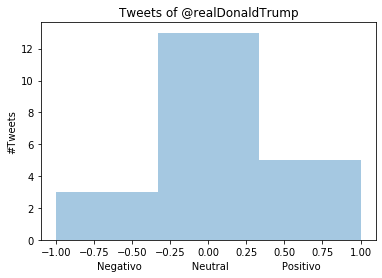

In [65]:
tw_trump_sent = anl_tweets(tw_trump, user_id)

In [66]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

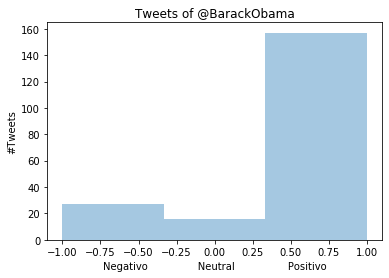

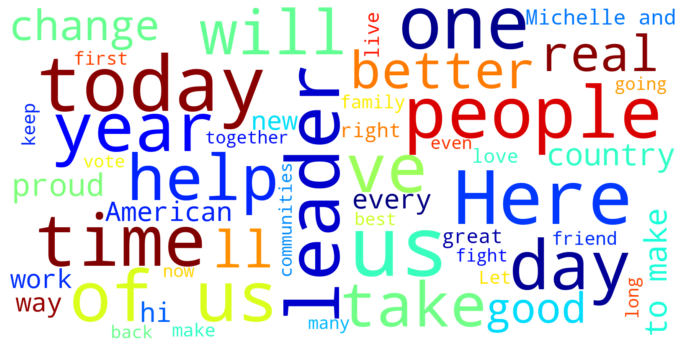

In [67]:
user_id = 'BarackObama' 
tw_obama = list_tweets(user_id, count)
tw_obama = clean_tweets(tw_obama)
tw_obama_sent = anl_tweets(tw_obama, user_id)
word_cloud(tw_obama)

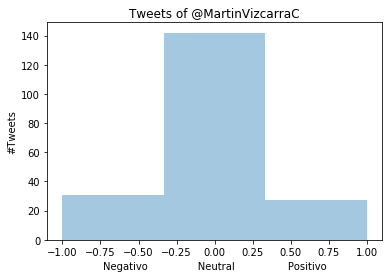

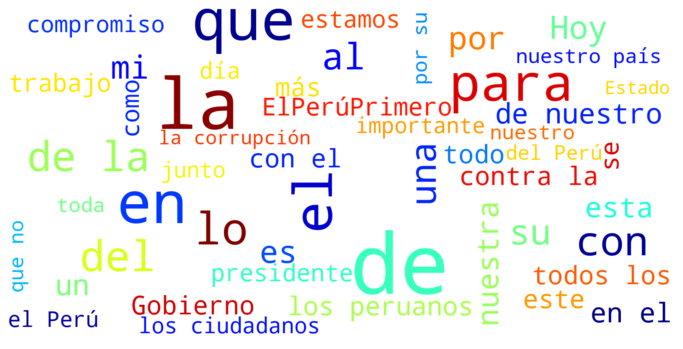

In [68]:
user_id = 'MartinVizcarraC' 
tw_obama = list_tweets(user_id, count)
tw_obama = clean_tweets(tw_obama)
tw_obama_sent = anl_tweets(tw_obama, user_id)
word_cloud(tw_obama)

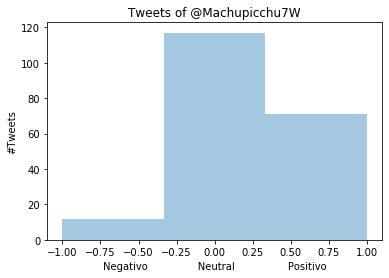

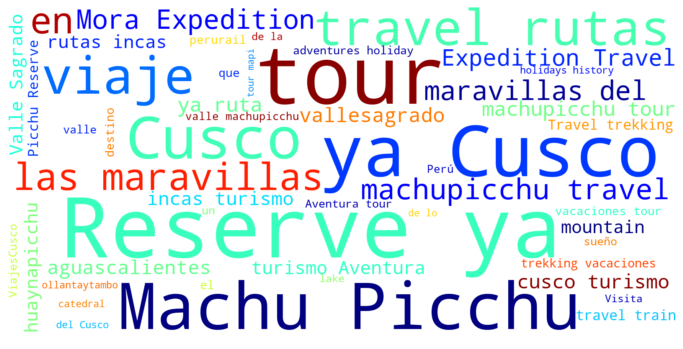

In [69]:
user_id = 'Machupicchu7W' 
tw_obama = list_tweets(user_id, count)
tw_obama = clean_tweets(tw_obama)
tw_obama_sent = anl_tweets(tw_obama, user_id)
word_cloud(tw_obama)

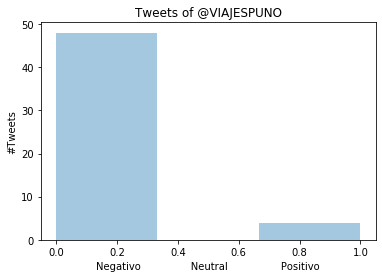

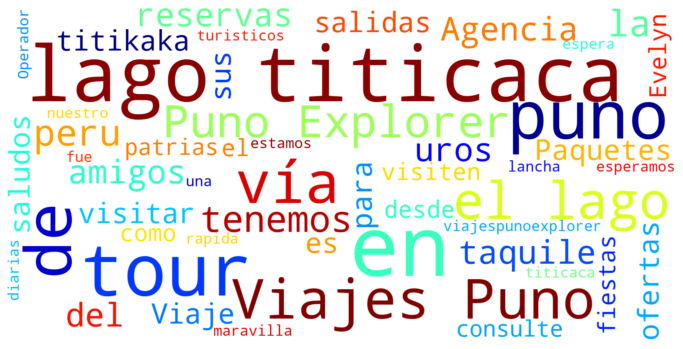

In [73]:
user_id = 'VIAJESPUNO' 
tw_dave = list_tweets(user_id, count)
tw_dave = clean_tweets(tw_dave)
tw_dave_sent = anl_tweets(tw_dave, user_id)
word_cloud(tw_dave)